In [196]:
##ScrapeLangmuirData
##Written by Rebecca Rapf
##June 10, 2021

###Read in csv's of Langmuir trough data and export the useful bits for loading into Igor

##import relevant libraries
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
#import csv

In [197]:
##Parameters to be changed for each analysis##
FilePath = "/Users/timmo/Documents/RAPFLAB/code/langmuir/test/" ##currently local only, will change to read from google drive
OutFolder = "Processed"
XLabel = "Acm2"
YLabel="P"
OutputName = "Graph"
FileType = "xlsx" #pick from "xlsx" or "csv"
Surfactant = "MA_300mMKCl" #name of surfactant and/or conditions
#StockConcSame = "yes" #"yes" or "no" if same concentration was used for each run

StockConc = 4.18 #mM 
#MM = 284.48 #molecular weight in (g/mol)
VolDeposit_uL = 20 #volume stock solution deposited in 
########

##File-Specific Parameters####
header_length = 43 #skip the first 43 lines in the file
#########

##Constants Library##
AVOGADRO = 6.022*10**23
uL_CONVERSION = 10**6 #number of uL in 1 L
Ang_CONVERSION = 10**10 #number of Angstroms in 1 m
cm_CONVERSION = 10**2 #number of cm in 1 m
cm2_to_Ang2 = Ang_CONVERSION**2/cm_CONVERSION**2
#print(cm2_to_Ang2)
###########

####Calculate number of molecules deposited###
VolDeposit_L = VolDeposit_uL/uL_CONVERSION
AmountDeposit = ((StockConc/1000))*(VolDeposit_L)
NumMolecules = AmountDeposit*AVOGADRO
#print(NumMolecules)

##Set file path to where data is being held locally
os.chdir(FilePath)
print(os.getcwd())
print(FilePath+OutFolder)


C:\Users\timmo\Documents\RAPFLAB\code\langmuir\test
/Users/timmo/Documents/RAPFLAB/code/langmuir/test/Processed


In [198]:
files = sorted(glob.glob("21"+"*"+FileType))
files.sort(key=os.path.getmtime)
print(files)

num_files = len(files)

AllFiles = pd.DataFrame()

for entry in range(len(files)):
    name = files[entry]
    outname = name[:-(len(FileType)+1)]
    #print(name)
    if FileType == "csv":
        CurrFile = pd.read_csv(files[entry],skiprows = header_length)
    elif FileType == "xlsx":
        #CompFile = files[entry]
        #print(CompFile)
        CurrFile = pd.read_excel(files[entry],skiprows = header_length)
        #print(CurrFile)
        #print("excel")
        CurrFile = CurrFile.rename(columns={CurrFile.columns[3]: "A_cm2"})
        CurrFile = CurrFile.rename(columns={CurrFile.columns[4]: "MMA"})
        MMA = CurrFile["MMA"]
        #print(CurrFile)
        
        #MMACheck = CurrFile["MMA"]
        #print(CurrFile.iloc[0,4])
        if np.isnan(CurrFile.iloc[0,4]) == True:
            A_Ang2 = (CurrFile["A_cm2"]*cm2_to_Ang2)
            CurrFile.insert(4, "A_Ang2", A_Ang2)
            MMA=CurrFile["A_Ang2"]/NumMolecules
            print("fixing")
        
        
        IndFile = pd.DataFrame(columns = [outname+"_Acm2",outname+"_P",outname+"_MMA"])
        IndFile[outname+"_Acm2"]=CurrFile["A_cm2"]
        IndFile[outname+"_P"]=CurrFile["P1[mN/m]"]
        IndFile[outname+"_MMA"]=MMA
        
        AllFiles[outname+"_Acm2"]=CurrFile["A_cm2"]
        AllFiles[outname+"_P"]=CurrFile["P1[mN/m]"]
        AllFiles[outname+"_MMA"]=MMA
        
        IndFile.to_csv("../"+OutFolder+"/"+outname+"_Processed.csv")
AllFiles.to_csv(OutFolder+"/"+Surfactant+"_AllProcessed.csv")






####### JUST COMBINE THE SCRAPE WITH ADDING VALUES TO A LIST --> MAY BE EASIER THAN TRYING TO CALL THE FILES AGAIN --> ALREADY HAVE THE FILES MUCH EASIER


['210614_1654_MA_300mMKCl_bad.xlsx', '210614_1050_MA_300mMKCl.xlsx']


FileNotFoundError: [Errno 2] No such file or directory: '../Processed/210614_1654_MA_300mMKCl_bad_Processed.csv'

In [206]:
os. chdir((FilePath)+OutFolder) #sets working directory to new folder???
files2 = sorted(glob.glob("*"+FileType))
files2.sort(key=os.path.getmtime)
num_files = len(files)

XAxis=[]
YAxis=[] #creates to empty sets where the x and y values of all documents will be appended for later graphing
legendNames=[]


cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

for entry in range(len(files2)):
    name = files2[entry]
    read = (name[:-4]+"_")
    
    if FileType == "csv":  
        CurrFile = pd.read_csv(files2[entry])#sets amount of lines to skip at beginning and end of a document
        CurrFile.columns=[number, Acm2,P, MMA]
        XAxis.append(CurrFile[Acm2])
        YAxis.append(CurrFile[P])
        FullSplit = name.split("_") #gets all parts of the file name
        legendNames.append(FullSplit[3])# gets the hour/time labelling (0 is date, 1 is name of compound/molarity, 2 is time
  #reads all files in given folder if they are csv and appends wavelength and Absorbance to XAxis and YAxis dataframes
    
  
   # elif FileType == "xlsx":   #if file is not csv but is xlsx it goes through this function instead
        #CompFile = files[entry]
        #print(CompFile)
        read = (name[:-5]+"_")
        CurrFile = pd.read_csv(files2[entry])#sets amount of lines to skip at beginning and end of a document
        CurrFile.columns=[number,Acm2,P,MMA]
        XAxis.append(CurrFile[Acm2])
        YAxis.append(CurrFile[P])
      
        FullSplit = name.split("_") #gets all parts of the file name
        legendNames.append(FullSplit[3])# gets the hour/time labelling (0 is date, 1 is name of compound/molarity, 2 is time
            
print(XAxis)

print(CurrFile)

Files in 'C:\\Users\\timmo\\Documents\\RAPFLAB\\code\\langmuir\\test\\Processed': ['210614_1050_MA_300mMKCl_Processed.csv', '210614_1654_MA_300mMKCl_bad_Processed.csv', 'Graph.png', 'MA_300mMKCl_AllProcessed.csv', 'Processed']
[]
       t[s]     Bpos  Bspd   A_cm2    MMA  P1[mN/m]  P2[mN/m]   T[°C]  SP[V]  \
0      0.13    0.000     0  243.00  46.07    0.0639         0 -293.13    NaN   
1      1.14    0.599    50  242.10  45.90    0.0604         0 -192.80    NaN   
2      2.17    1.453    50  240.82  45.66    0.0715         0  -53.34    NaN   
3      3.17    2.306    50  239.54  45.41    0.0487         0  184.67    NaN   
4      4.18    3.141    50  238.29  45.18    0.0356         0  153.03    NaN   
..      ...      ...   ...     ...    ...       ...       ...     ...    ...   
153  160.12  133.282    50   43.08   8.17   12.4179         0 -263.21    NaN   
154  161.20  134.178    50   41.73   7.91   12.2836         0 -278.74    NaN   
155  162.29  135.093    50   40.36   7.65   12.775

In [200]:
def FigStyle(): #axis will be shared
    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    plt.rcParams['axes.linewidth'] = 1
    mpl.rcParams['axes.spines.right'] = True
    mpl.rcParams['axes.spines.top'] = True
    #plt.axis(xmin=0,xmax=250)
    
    mpl.rcParams['xtick.top']=False
    mpl.rcParams['ytick.right']=False
    ax.tick_params(direction='inout')
    ax.tick_params('both', length=6, width=2, which='major')
    ax.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.01, 1)) #creates legend and specifies location + formatting
   
    plt.xlabel(XLabel, size=15) #x axis label
    plt.ylabel(YLabel, size=17) #y axis label
    
    #ax.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.02, 1)) #creates legend and specifies location + formatting
    
    
    plt.savefig(OutputName+".png", dpi=300, transparent=False) 
    plt.show() #shows the final plot
    

    #sets basic formatting for our plot


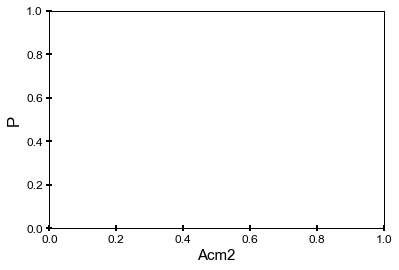

In [201]:
fig, ax = plt.subplots(sharex =True , sharey= True, figsize=(6,4))
for i in range(len(XAxis)):
    x= XAxis[i]
    y= YAxis[i] #plots the x and y values of each dataframe individually on a shared axis
    plt.plot(x, y) #actually plots our graph
    

FigStyle();  
plt.show() #shows the final plot
